<a href="https://colab.research.google.com/github/LuckySe7en82/Clarusway-DS-12-22-Course/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [33]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

print(tf.__version__)

2.9.2


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

In [5]:
#label interger b/w 0 and 9 
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
#Creating column labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train[0]

9

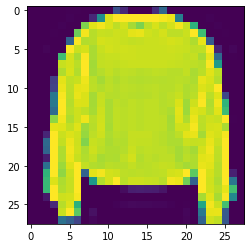

In [9]:
plt.imshow(X_train[7]);

In [10]:
class_names[int(y_train[7])]

'Pullover'

In [11]:
class_names[int(X_train[9][0][0])]

'T-shirt/top'

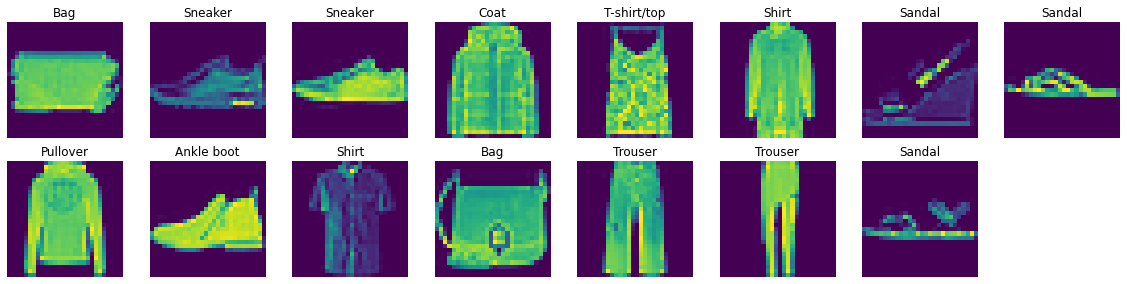

In [12]:
plt.figure(figsize=(20, 20))
for i in range(15):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(class_names[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train[7].min()

0

In [14]:
X_train[7].max()

255

In [15]:
# Normalize image pixels b/c  of backpropogation

X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [16]:
X_train[7].min()

0.0

In [17]:
X_train[7].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
# use to_categorical() function to convert each label into a one-hot vector
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [23]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
y_train[0]

9

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

In [26]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
CNN = Sequential()

CNN.add(Conv2D(filters = 28, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth, followed by the flatten and multiple dense layers

CNN.add(Conv2D(filters = 28, kernel_size=(3,3), 
                strides=(2, 2), padding="same", 
                activation='relu'))

CNN.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))


CNN.add(Flatten()) 

CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

# pass optimizer by name: 
CNN.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])     

In [28]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 28)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 28)          7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112)               0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=2,
                           restore_best_weights=True)

In [31]:
CNN.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=20,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 16s 4ms/step - loss: 0.5837 - accuracy: 0.7880 - val_loss: 0.4330 - val_accuracy: 0.8418
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3766 - accuracy: 0.8630 - val_loss: 0.3613 - val_accuracy: 0.8693
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3273 - accuracy: 0.8812 - val_loss: 0.3314 - val_accuracy: 0.8796
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8915 - val_loss: 0.3318 - val_accuracy: 0.8795
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8972 - val_loss: 0.3163 - val_accuracy: 0.8849
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9033 - val_loss: 0.3085 - val_accuracy: 0.8900
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9062 - val_loss: 0.3120 - val_accuracy

Early stop before epoch 8 to prevent overfitting

**TASK 7: Plot values of metrics you used in your model.**

In [34]:
summary = pd.DataFrame(CNN.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.583715,0.788050,0.432972,0.8418
1,0.376588,0.863050,0.361316,0.8693
2,0.327312,0.881200,0.331443,0.8796
3,0.298109,0.891483,0.331842,0.8795
4,0.280176,0.897200,0.316256,0.8849
5,0.266547,0.903333,0.308534,0.8900
6,0.255772,0.906217,0.311959,0.8876
7,0.247407,0.909933,0.312244,0.8905


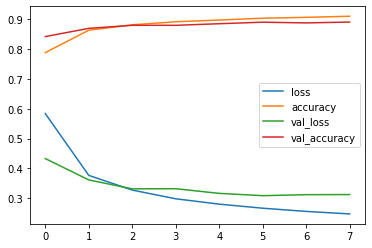

In [42]:
summary.plot();

In [35]:
CNN.metrics_names

['loss', 'accuracy']

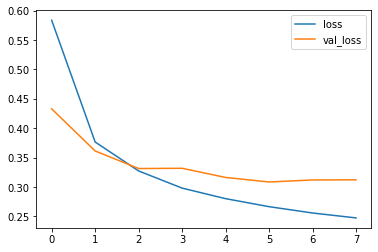

In [36]:
summary[["loss", "val_loss"]].plot()
plt.show()

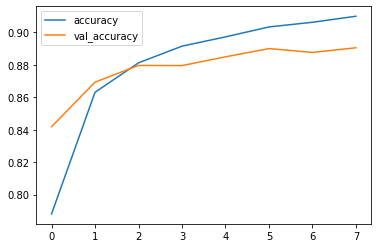

In [37]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

No overfitting or underfitting

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
CNN.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3085 - accuracy: 0.8900


[0.30853402614593506, 0.8899999856948853]

In [41]:
score = CNN.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30853402614593506
Test accuracy: 0.8899999856948853


In [43]:
predictions = CNN.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[8.86731868e-06, 5.18826704e-10, 5.77302671e-07, ...,
        8.25893357e-02, 8.30789722e-05, 9.07198131e-01],
       [1.62446904e-05, 3.75161546e-09, 9.30175364e-01, ...,
        1.53780724e-10, 1.20653411e-07, 5.76211800e-10],
       [1.76238935e-09, 9.99999881e-01, 5.93830707e-10, ...,
        6.39765002e-14, 4.62412955e-11, 2.76356105e-10],
       ...,
       [6.77794378e-06, 3.72197851e-13, 9.24169896e-08, ...,
        3.92161681e-08, 9.99873757e-01, 3.31924682e-10],
       [1.23844975e-05, 9.99114931e-01, 1.17640752e-06, ...,
        5.29444977e-09, 9.62532340e-07, 6.70149575e-06],
       [1.20319986e-04, 4.19196340e-07, 1.76239308e-04, ...,
        1.75078049e-01, 5.74506866e-03, 4.02262760e-03]], dtype=float32)

In [45]:
predictions.shape

(10000, 10)

In [47]:
y_pred = np.argmax(predictions, axis=1)
y_pred 

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.79      0.83      1000
           3       0.81      0.94      0.87      1000
           4       0.81      0.82      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.71      0.70      0.70      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [52]:
class_names[2]

'Pullover'

Class name is correct

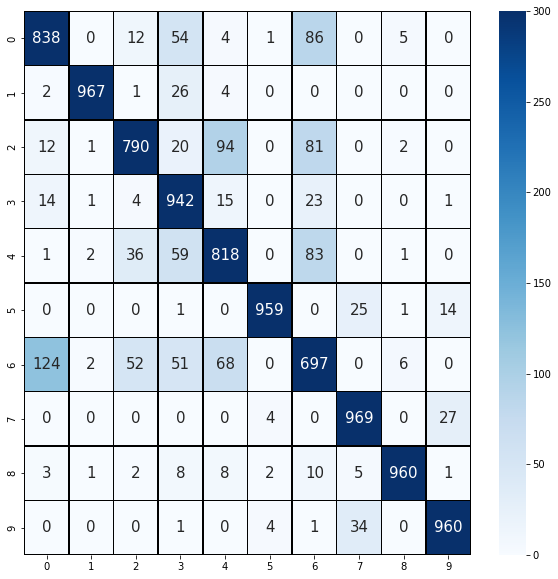

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap="Blues",
            linewidths=.5,
            linecolor='black',
            fmt='g',
            annot_kws={"size": 15},
            vmax = 300)
plt.show()

from confusion matirx Misclassification occured but not in large numbers

## Prediction

In [65]:
my_image = X_test[7]

In [66]:
my_image.shape

(28, 28, 1)

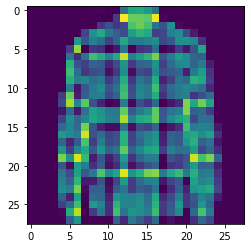

In [67]:
# plt.imshow(my_image)
# plt.show();

plt.imshow(my_image.reshape(28,28));

In [68]:
image_prediction = CNN.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 104ms/step


In [69]:
image_prediction

array([[2.0627663e-06, 6.0035896e-12, 7.6387037e-04, 2.1265696e-06,
        3.2392912e-02, 4.8329241e-07, 9.6683806e-01, 3.6220618e-09,
        4.2650120e-07, 3.8534861e-10]], dtype=float32)

In [70]:
result = np.argmax(image_prediction, axis=1)

In [71]:
result

array([6])

In [72]:
class_names[int(result)]

'Shirt'

In [73]:
CNN.save("cnn-1.h5")

Load the Saved Model and Get Predictions

In [74]:
model = tf.keras.models.load_model('cnn-1.h5')

In [75]:
pred=model.predict(np.expand_dims(X_test[20],axis=0))

1/1 [==============================] - 0s 63ms/step


In [76]:
np.argmax(pred)

2

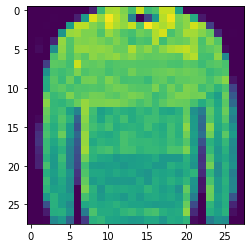

In [78]:
plt.imshow(X_test[20].reshape(28,28))

In [79]:
class_names[2]

'Pullover'

Correct predictions

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___